<a href="https://colab.research.google.com/github/csabamedgyes/DL_HW4_RF8I8P/blob/main/medcsab_hf4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
# installing fiftyone
!pip install fiftyone

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [28]:
# importing packages we need
import fiftyone as fo
import fiftyone.zoo as foz
import os

In [29]:
#dog dataset (1st category)
dogs = foz.load_zoo_dataset("open-images-v6",split="validation",classes = ["Dog"],max_samples=400,dataset_name="dog",)

#car dataset (2nd category)
cars = foz.load_zoo_dataset("open-images-v6",split="validation",classes = ["Car"],max_samples=400,dataset_name="car",)

#boy dataset (3rd category)
boys = foz.load_zoo_dataset("open-images-v6",split="validation",classes = ["Boy"],max_samples=400,dataset_name="boy",)

INFO:fiftyone.zoo.datasets:Downloading split 'validation' to '/root/fiftyone/open-images-v6/validation' if necessary


Necessary images already downloaded


INFO:fiftyone.utils.openimages:Necessary images already downloaded


Existing download of split 'validation' is sufficient


INFO:fiftyone.zoo.datasets:Existing download of split 'validation' is sufficient


Loading existing dataset 'dog'. To reload from disk, either delete the existing dataset or provide a custom `dataset_name` to use


INFO:fiftyone.zoo.datasets:Loading existing dataset 'dog'. To reload from disk, either delete the existing dataset or provide a custom `dataset_name` to use


INFO:fiftyone.zoo.datasets:Downloading split 'validation' to '/root/fiftyone/open-images-v6/validation' if necessary


Necessary images already downloaded


INFO:fiftyone.utils.openimages:Necessary images already downloaded


Existing download of split 'validation' is sufficient


INFO:fiftyone.zoo.datasets:Existing download of split 'validation' is sufficient


Loading existing dataset 'car'. To reload from disk, either delete the existing dataset or provide a custom `dataset_name` to use


INFO:fiftyone.zoo.datasets:Loading existing dataset 'car'. To reload from disk, either delete the existing dataset or provide a custom `dataset_name` to use


INFO:fiftyone.zoo.datasets:Downloading split 'validation' to '/root/fiftyone/open-images-v6/validation' if necessary


Necessary images already downloaded


INFO:fiftyone.utils.openimages:Necessary images already downloaded


Existing download of split 'validation' is sufficient


INFO:fiftyone.zoo.datasets:Existing download of split 'validation' is sufficient


Loading existing dataset 'boy'. To reload from disk, either delete the existing dataset or provide a custom `dataset_name` to use


INFO:fiftyone.zoo.datasets:Loading existing dataset 'boy'. To reload from disk, either delete the existing dataset or provide a custom `dataset_name` to use


In [30]:
#we should export the datasets to local folders

dogs.export(
   export_dir="/home/csaba/Pictures/datasets/train/dogs",
   dataset_type = fo.types.ImageDirectory,
)

cars.export(
   export_dir="/home/csaba/Pictures/datasets/train/cars",
   dataset_type = fo.types.ImageDirectory,
)

boys.export(
   export_dir="/home/csaba/Pictures/datasets/train/boys",
   dataset_type = fo.types.ImageDirectory,
)

boys=os.listdir('/home/csaba/Pictures/datasets/train/boys')
cars=os.listdir('/home/csaba/Pictures/datasets/train/cars')
dogs=os.listdir('/home/csaba/Pictures/datasets/train/dogs')

Directory '/home/csaba/Pictures/datasets/train/dogs' already exists; export will be merged with existing files


 100% |█████████████████| 400/400 [5.0s elapsed, 0s remaining, 89.0 samples/s]      


INFO:eta.core.utils: 100% |█████████████████| 400/400 [5.0s elapsed, 0s remaining, 89.0 samples/s]      


Directory '/home/csaba/Pictures/datasets/train/cars' already exists; export will be merged with existing files


 100% |█████████████████| 400/400 [6.3s elapsed, 0s remaining, 102.9 samples/s]      


INFO:eta.core.utils: 100% |█████████████████| 400/400 [6.3s elapsed, 0s remaining, 102.9 samples/s]      


Directory '/home/csaba/Pictures/datasets/train/boys' already exists; export will be merged with existing files


 100% |█████████████████| 400/400 [12.2s elapsed, 0s remaining, 41.1 samples/s]      


INFO:eta.core.utils: 100% |█████████████████| 400/400 [12.2s elapsed, 0s remaining, 41.1 samples/s]      


In [31]:
# we want our data in a train-validation-test form, so we have to move data
# of images in datasets 200-100-100
import shutil

source_folder = "/home/csaba/Pictures/datasets/train/"
destination_folder = "/home/csaba/Pictures/datasets/validation/"
destination_folder_2 = "/home/csaba/Pictures/datasets/test/"

if not os.path.isdir("/home/csaba/Pictures/datasets/validation"):
  os.mkdir("/home/csaba/Pictures/datasets/validation")
if not os.path.isdir("/home/csaba/Pictures/datasets/test"):
  os.mkdir("/home/csaba/Pictures/datasets/test")

# moving the data into our directories
for directory_name in ['boys','cars','dogs']:
  if not os.path.isdir(destination_folder + directory_name):
        os.mkdir(destination_folder + directory_name)
  if not os.path.isdir(destination_folder_2 + directory_name):
        os.mkdir(destination_folder_2 + directory_name)
  # 100 samples into validation,
  # 100 samples into test 
  # 200 samples stay in the train folder
  for i, file_name in enumerate(os.listdir(source_folder+directory_name)):
    if i<100:
      source = source_folder + directory_name + '/' + file_name
      destination = destination_folder + directory_name + '/' + file_name
      shutil.move(source, destination)
    elif i<200:
      source = source_folder + directory_name + '/' + file_name
      destination = destination_folder_2 + directory_name + '/' + file_name
      shutil.move(source, destination)

In [32]:
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.inception_v3 import InceptionV3,preprocess_input,decode_predictions
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras import backend as K
import numpy as np

In [33]:
img_height=299
img_width=299

In [34]:
# importing pretrained model, without the fully-connected layers
base_model = InceptionV3(weights='imagenet', include_top=False)
# we put a global average pooling layer after the last concolutional layer
x = base_model.output
x = GlobalAveragePooling2D()(x)
# adding a feedforward layer with activation ReLu
x = Dense(1024, activation='relu')(x)
# and finally adding a last layer, there will be 3 outputs
# - categorical_crossentropy needs this
predictions = Dense(3, activation='softmax')(x)
# creating model
model = Model(inputs=base_model.input, outputs=predictions)

In [35]:
for layer in base_model.layers:
    layer.trainable = False

# we do not train the base model, but only the last added layers
# we have 3 categories, so we should use loss categorical_crossentropy
model.compile(optimizer='adam', metrics=['accuracy'],loss='categorical_crossentropy')

In [36]:
train_dir = "/home/csaba/Pictures/datasets/train/"
validation_dir = "/home/csaba/Pictures/datasets/validation/"

In [37]:
# preparing images for loading in and data augmentation
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(img_height, img_width), batch_size=20, class_mode='categorical')
validation_generator = test_datagen.flow_from_directory(validation_dir, target_size=(img_height, img_width), batch_size=20, class_mode='categorical')

Found 600 images belonging to 3 classes.
Found 300 images belonging to 3 classes.


In [38]:
# this function does data augmentation and trains the network
model.fit_generator(train_generator,steps_per_epoch=200,validation_data=validation_generator,validation_steps=10,epochs=3)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/3
 30/200 [===>..........................] - ETA: 13:53 - loss: 0.7465 - accuracy: 0.7433

200/200 [==============================] - 201s 950ms/step - loss: 0.7465 - accuracy: 0.7433 - val_loss: 0.1771 - val_accuracy: 0.9650


In [39]:
print("Convolutional layers of Inception V3:")
for i, layer in enumerate(base_model.layers):
    print(i, layer.name)

Convolutional layers of Inception V3:
0 input_2
1 conv2d_94
2 batch_normalization_94
3 activation_94
4 conv2d_95
5 batch_normalization_95
6 activation_95
7 conv2d_96
8 batch_normalization_96
9 activation_96
10 max_pooling2d_4
11 conv2d_97
12 batch_normalization_97
13 activation_97
14 conv2d_98
15 batch_normalization_98
16 activation_98
17 max_pooling2d_5
18 conv2d_102
19 batch_normalization_102
20 activation_102
21 conv2d_100
22 conv2d_103
23 batch_normalization_100
24 batch_normalization_103
25 activation_100
26 activation_103
27 average_pooling2d_9
28 conv2d_99
29 conv2d_101
30 conv2d_104
31 conv2d_105
32 batch_normalization_99
33 batch_normalization_101
34 batch_normalization_104
35 batch_normalization_105
36 activation_99
37 activation_101
38 activation_104
39 activation_105
40 mixed0
41 conv2d_109
42 batch_normalization_109
43 activation_109
44 conv2d_107
45 conv2d_110
46 batch_normalization_107
47 batch_normalization_110
48 activation_107
49 activation_110
50 average_pooling2d_10

In [40]:
for layer in model.layers[:172]:
       layer.trainable = False
for layer in model.layers[172:]:
       layer.trainable = True

In [41]:
# we have to compile the network again
model.compile(optimizer=SGD(learning_rate=0.0001, momentum=0.9), metrics=['accuracy'], loss='categorical_crossentropy')

In [42]:
#training
model.fit_generator(train_generator,steps_per_epoch=200,validation_data=validation_generator,validation_steps=10,epochs=3)
print("Training is over.")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/3
 30/200 [===>..........................] - ETA: 26:10 - loss: 0.5012 - accuracy: 0.8683

200/200 [==============================] - 334s 2s/step - loss: 0.5012 - accuracy: 0.8683 - val_loss: 0.1649 - val_accuracy: 0.9700
Training is over.


In [43]:
predicts=[]
for category_name in ['boys', 'cars', 'dogs']:
  for image_name in os.listdir('/home/csaba/Pictures/datasets/test/' + category_name):
      pred_vector=np.array([0,0,0])
      img_path = '/home/csaba/Pictures/datasets/test/' + category_name + '/' + image_name
      img = image.load_img(img_path, target_size=(299, 299))
      x = image.img_to_array(img)
      x = np.expand_dims(x, axis=0)
      x = preprocess_input(x)
      preds = model.predict(x)
      predicts.append(np.argmax(preds,axis=1))

1/1 [==============================] - 0s 271ms/step


In [44]:
#reshaping predicts
predicts=np.asarray(predicts).reshape((300))

In [45]:
#creating labels for the categories
boy_array=np.zeros(100)
car_array=np.ones(100)
dog_array=np.ones(100)*2
y_test=np.concatenate((boy_array, car_array), axis=0)
y_test=np.concatenate((y_test, dog_array), axis=0)

test accuracy: 0.96
Precision 0.9602532721434667
Recall 0.96
f1_score 0.9600125555399694


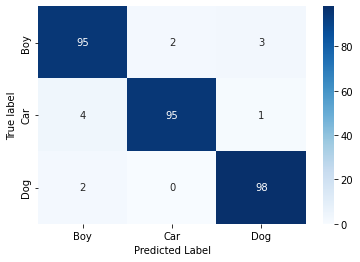

In [46]:
#making confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
conf=confusion_matrix(y_test,predicts)

#printing the confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns;
axis_labels = ['Boy', 'Car', 'Dog']
ax = sns.heatmap(conf, annot=True, fmt='d', cmap=plt.cm.Blues, xticklabels=axis_labels, yticklabels=axis_labels)
ax.set(xlabel='Predicted Label',
       ylabel='True label');

print("test accuracy: %g" %(accuracy_score(y_test, predicts)))
print("Precision", precision_score(y_test, predicts, average="macro"))
print("Recall", recall_score(y_test, predicts, average="macro"))
print("f1_score", f1_score(y_test, predicts, average="macro"))